# Auxílio na tomada de decisão no processo de escolha de frutas e vegetais
### by Lucas de Jesus

Importação das bibliotecas necessárias

In [1]:
import numpy as np
from numpy.random import seed
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score

## Tratamento/organização da estrutura dos dados

Lê o arquivo csv com as features

In [2]:
diretorio_features = "C:/Users/lucas/OneDrive/Documentos/F&V/fruitnet/Processed Images_Fruits/"
df = pd.read_csv(diretorio_features + "data.csv")

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,2040,2041,2042,2043,2044,2045,2046,2047,ImageId,Qualidade
0,0.812089,0.000000,0.233512,0.000000,0.022075,0.177229,0.000000,0.000000,0.046863,0.642263,...,0.000000,0.012494,0.062097,0.329836,0.000000,0.301165,0.000000,0.049723,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,0
1,2.007975,0.130812,0.645007,0.005651,0.000000,0.000000,0.000000,0.000000,0.027242,0.064694,...,0.658870,0.107789,0.000000,0.050416,0.020219,1.158088,0.000000,0.203732,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,0
2,1.452222,0.010259,0.061030,0.100477,0.161919,0.058856,0.002227,0.048041,0.046003,0.555546,...,0.474471,0.000000,0.107993,0.165584,0.086077,0.228294,0.055014,0.179556,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,0
3,1.721891,0.069463,0.275250,0.674763,0.350636,0.000000,0.000000,0.082744,0.000000,0.554559,...,0.000000,0.000000,0.463891,0.371997,1.286904,1.593021,0.013844,0.000000,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,0
4,0.313880,0.141807,0.170546,0.550855,0.299191,0.012076,0.071305,0.140486,0.000000,0.707265,...,0.000000,0.000481,0.000000,0.026284,0.531385,0.518031,0.022840,0.000000,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19521,3.514952,0.589922,0.420647,0.710394,0.189993,0.018829,0.000000,0.148587,0.411278,0.213874,...,0.098636,0.008464,0.702275,0.000000,0.014291,2.631745,0.614610,0.152490,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,2
19522,3.706188,0.360693,0.225129,0.613530,0.241168,0.465065,0.000000,0.131877,0.321608,0.095309,...,0.369143,0.022112,0.706179,0.000000,0.176800,1.730300,0.626712,0.291197,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,2
19523,2.763747,0.467841,0.090997,1.221117,0.240596,0.448695,0.078005,0.093327,0.262737,0.143238,...,0.132788,0.002930,0.441962,0.000000,0.008939,1.877034,0.191286,0.126135,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,2
19524,3.854888,0.298927,0.209296,0.975982,0.480537,0.632171,0.463008,0.218467,0.321193,0.059494,...,0.150068,0.117594,0.767495,0.000000,0.000228,2.594018,1.467491,0.077223,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,2


Extrai o nome de cada fruta

In [4]:
#dicionário para indexar as frutas
nome_frutas = {"Apple":0, "Banana":1, "Guava":2, "Lime":3, "Orange":4, "Pomegranate":5}
df_nome = []

#procura pelo endereço de cada imagem marcada no csv
for addr in df["ImageId"]:
    
    #procura pelo nome do diretório que contêm o nome da fruta
    nome = addr.split("/")[9]
    pos_underline = nome.find("_")
    
    #se não encontrar o underline no nome da fruta (que ocorre na pasta de Mixed quality)
    if pos_underline == -1: 
        df_nome.append(nome_frutas[nome])
    else:
        df_nome.append(nome_frutas[nome[:pos_underline]]) #ignora a qualidade, que está após o _


Adiciona colunas de Nomes

In [5]:
df["Nome"] = df_nome
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2041,2042,2043,2044,2045,2046,2047,ImageId,Qualidade,Nome
0,0.812089,0.000000,0.233512,0.000000,0.022075,0.177229,0.000000,0.000000,0.046863,0.642263,...,0.012494,0.062097,0.329836,0.000000,0.301165,0.000000,0.049723,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,0,0
1,2.007975,0.130812,0.645007,0.005651,0.000000,0.000000,0.000000,0.000000,0.027242,0.064694,...,0.107789,0.000000,0.050416,0.020219,1.158088,0.000000,0.203732,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,0,0
2,1.452222,0.010259,0.061030,0.100477,0.161919,0.058856,0.002227,0.048041,0.046003,0.555546,...,0.000000,0.107993,0.165584,0.086077,0.228294,0.055014,0.179556,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,0,0
3,1.721891,0.069463,0.275250,0.674763,0.350636,0.000000,0.000000,0.082744,0.000000,0.554559,...,0.000000,0.463891,0.371997,1.286904,1.593021,0.013844,0.000000,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,0,0
4,0.313880,0.141807,0.170546,0.550855,0.299191,0.012076,0.071305,0.140486,0.000000,0.707265,...,0.000481,0.000000,0.026284,0.531385,0.518031,0.022840,0.000000,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,0,0


## Codificação das classes

#### cód. qualidade 
<ul>
    <li>0 = Good</li>
    <li>1 = Bad</li>
    <li>2 = Mixed</li>
</ul>

#### cód. fruta
<ul>
    <li>0 = Maçã</li>
    <li>1 = Banana</li>
    <li>2 = Guava</li>
    <li>3 = Lima</li>
    <li>4 = Laranja</li>
    <li>5 = Romã</li>
</ul>

### cód resultante
COD = 3*cod_nome + cod_qualidade

In [6]:
def id_converter(qualidade, nome):
    return 3*nome + qualidade

df["Nome_Qualidade"] = id_converter(df["Qualidade"], df["Nome"])
df

,0,1,2,3,4,5,6,7,8,9,...,2042,2043,2044,2045,2046,2047,ImageId,Qualidade,Nome,Nome_Qualidade
0,0.812089,0.000000,0.233512,0.000000,0.022075,0.177229,0.000000,0.000000,0.046863,0.642263,...,0.062097,0.329836,0.000000,0.301165,0.000000,0.049723,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,0,0,0
1,2.007975,0.130812,0.645007,0.005651,0.000000,0.000000,0.000000,0.000000,0.027242,0.064694,...,0.000000,0.050416,0.020219,1.158088,0.000000,0.203732,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,0,0,0
2,1.452222,0.010259,0.061030,0.100477,0.161919,0.058856,0.002227,0.048041,0.046003,0.555546,...,0.107993,0.165584,0.086077,0.228294,0.055014,0.179556,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,0,0,0
3,1.721891,0.069463,0.275250,0.674763,0.350636,0.000000,0.000000,0.082744,0.000000,0.554559,...,0.463891,0.371997,1.286904,1.593021,0.013844,0.000000,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,0,0,0
4,0.313880,0.141807,0.170546,0.550855,0.299191,0.012076,0.071305,0.140486,0.000000,0.707265,...,0.000000,0.026284,0.531385,0.518031,0.022840,0.000000,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19521,3.514952,0.589922,0.420647,0.710394,0.189993,0.018829,0.000000,0.148587,0.411278,0.213874,...,0.702275,0.000000,0.014291,2.631745,0.614610,0.152490,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,2,5,17
19522,3.706188,0.360693,0.225129,0.613530,0.241168,0.465065,0.000000,0.131877,0.321608,0.095309,...,0.706179,0.000000,0.176800,1.730300,0.626712,0.291197,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,2,5,17
19523,2.763747,0.467841,0.090997,1.221117,0.240596,0.448695,0.078005,0.093327,0.262737,0.143238,...,0.441962,0.000000,0.008939,1.877034,0.191286,0.126135,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,2,5,17
19524,3.854888,0.298927,0.209296,0.975982,0.480537,0.632171,0.463008,0.218467,0.321193,0.059494,...,0.767495,0.000000,0.000228,2.594018,1.467491,0.077223,C:/Users/lucas/OneDrive/Documentos/F&V/fruitne...,2,5,17


## Análise do balanceamento do dataset

In [7]:
def correct_hist(val):
    labels, counts = np.unique(val, return_counts=True)
    plt.bar(labels, counts, align='center')
    plt.gca().set_xticks(labels)
    plt.show()

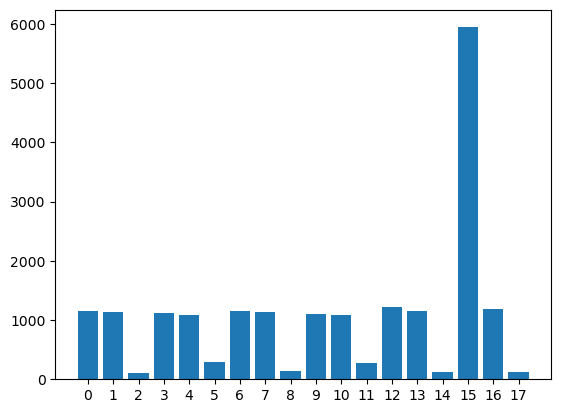

In [8]:
correct_hist(df["Nome_Qualidade"])

In [9]:
df["Nome_Qualidade"].value_counts()

15    5940
12    1216
16    1187
13    1159
6     1152
0     1149
1     1141
7     1129
3     1113
9     1094
4     1087
10    1085
5      285
11     278
8      148
14     125
17     125
2      113
Name: Nome_Qualidade, dtype: int64

## Separação de Features e Dados de Saída

Separa as features de cada imagem e o label esperado de saída

In [10]:
from sklearn.preprocessing import MinMaxScaler

faixa_features = [str(i) for i in range(2048)]

#separa as feature e realiza 
features = np.array(df[faixa_features])
saida = np.array(df['Nome_Qualidade'])


## Balanceando o Dataset

Conforme é possível perceber, este dataset se encontra desbalanceado, portanto antes de prosseguirmos, devemos seguir por esta etapa.

In [11]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomOverSampler(random_state=42)

#features e saídas
features, saida = sampler.fit_resample(features, saida)

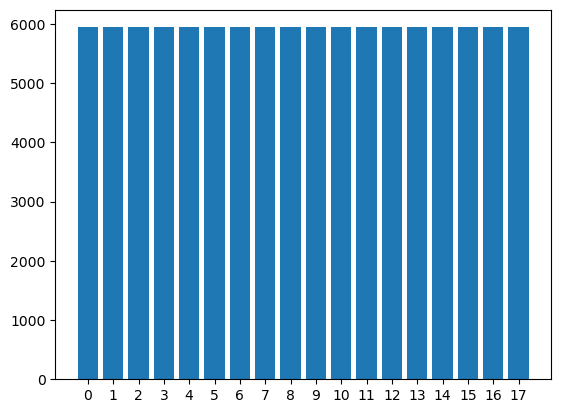

In [12]:
correct_hist(saida)

# Detecção de qualidade - Treinando a MLP

## Normalização das features

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler().fit(features)
features = scaler.transform(features)

## Codificação da saída

Aqui codificamos as variáveis de saída, de modo que a mesma seja adequada ao processo de classificação multiclasses

In [14]:
from keras.utils import np_utils

saida = np_utils.to_categorical(saida)
saida

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

## Separação do dataset em treino e teste

In [15]:
from sklearn.model_selection import train_test_split


#separa em dataset de treino e teste, 60/40
x_train, x_test, y_train, y_test = train_test_split(features, saida, test_size=0.4, random_state= 42)

In [16]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Grid search para encontrar os melhores hiperparâmetros

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

"""
params = {'activation': ['relu', 'tanh'],
          'hidden_layer_sizes': [(50,), (100,), (100, 50,), (50, 100), (200,)],
          'solver': ['adam', 'SGD'],
          'learning_rate' : ['constant', 'invscaling'],
          'batch_size': [50, 100],
          'alpha': [0.05]
         }

mlp_classif_grid = GridSearchCV(MLPClassifier(random_state=123, max_iter=500), param_grid=params, n_jobs=-1, cv=5, verbose=10)
mlp_classif_grid.fit(x_train,y_train)

print('Train Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(x_train, y_train))
print('Test Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(x_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%mlp_classif_grid.best_score_)
print('Best Parameters : ',mlp_classif_grid.best_params_)
"""
"""
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Train Accuracy : 1.000
Test Accuracy : 0.903
Best Accuracy Through Grid Search : 0.888
Best Parameters :  {'activation': 'relu', 'alpha': 0.05, 'batch_size': 50, 'hidden_layer_sizes': (50, 100), 'learning_rate': 'constant', 'solver': 'adam'}
"""

"\nFitting 5 folds for each of 40 candidates, totalling 200 fits\nTrain Accuracy : 1.000\nTest Accuracy : 0.903\nBest Accuracy Through Grid Search : 0.888\nBest Parameters :  {'activation': 'relu', 'alpha': 0.05, 'batch_size': 50, 'hidden_layer_sizes': (50, 100), 'learning_rate': 'constant', 'solver': 'adam'}\n"

# Modelo

Treinando o modelo

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

#para dar reproducibilidade
seed = 7
tf.random.set_seed(seed)

#cria o modelo
def create_model(opt, loss, metrics,  dropout_rate=0.0, initializer = 'normal', act = 'tanh'):
    model = Sequential()
    reg = tf.keras.regularizers.L2(l2=0.05)
    
    model.add(Dense(50, input_shape=(2048,), kernel_initializer= initializer, activation= act, kernel_regularizer=reg))
    model.add(Dropout(dropout_rate))
    model.add(Dense(100, kernel_initializer= initializer, activation= act, kernel_regularizer=reg))
    model.add(Dropout(dropout_rate))
    model.add(Dense(18, kernel_initializer= initializer, activation= act, kernel_regularizer=reg))

    
    model.compile(loss= loss, optimizer=opt, metrics= metrics)
    return model

In [19]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
init = tf.keras.initializers.GlorotNormal(seed = 9)

loss = "categorical_crossentropy"
metrics = ["accuracy"]
act = "relu"

teste = create_model(opt = opt, loss = loss, metrics = metrics, dropout_rate=0.15, initializer =init, act = act)

history = teste.fit(x_train, y_train, epochs= 50, batch_size= 50, verbose=1,
                    validation_split = 0.3, shuffle=True)

Epoch 1/50
899/899 [==============================] - 16s 15ms/step - loss: 12.6552 - accuracy: 0.3085 - val_loss: 10.5629 - val_accuracy: 0.5645
Epoch 2/50
899/899 [==============================] - 12s 14ms/step - loss: 10.3268 - accuracy: 0.5128 - val_loss: 9.3586 - val_accuracy: 0.7180
Epoch 3/50
899/899 [==============================] - 12s 14ms/step - loss: 9.1760 - accuracy: 0.6316 - val_loss: 8.2572 - val_accuracy: 0.8218
Epoch 4/50
899/899 [==============================] - 13s 14ms/step - loss: 8.3693 - accuracy: 0.6998 - val_loss: 7.6178 - val_accuracy: 0.8562
Epoch 5/50
899/899 [==============================] - 13s 14ms/step - loss: 7.7920 - accuracy: 0.7448 - val_loss: 7.1436 - val_accuracy: 0.8761
Epoch 6/50
899/899 [==============================] - 12s 14ms/step - loss: 7.3265 - accuracy: 0.7774 - val_loss: 6.6765 - val_accuracy: 0.8958
Epoch 7/50
899/899 [==============================] - 13s 14ms/step - loss: 6.8571 - accuracy: 0.8060 - val_loss: 6.2825 - val_accura

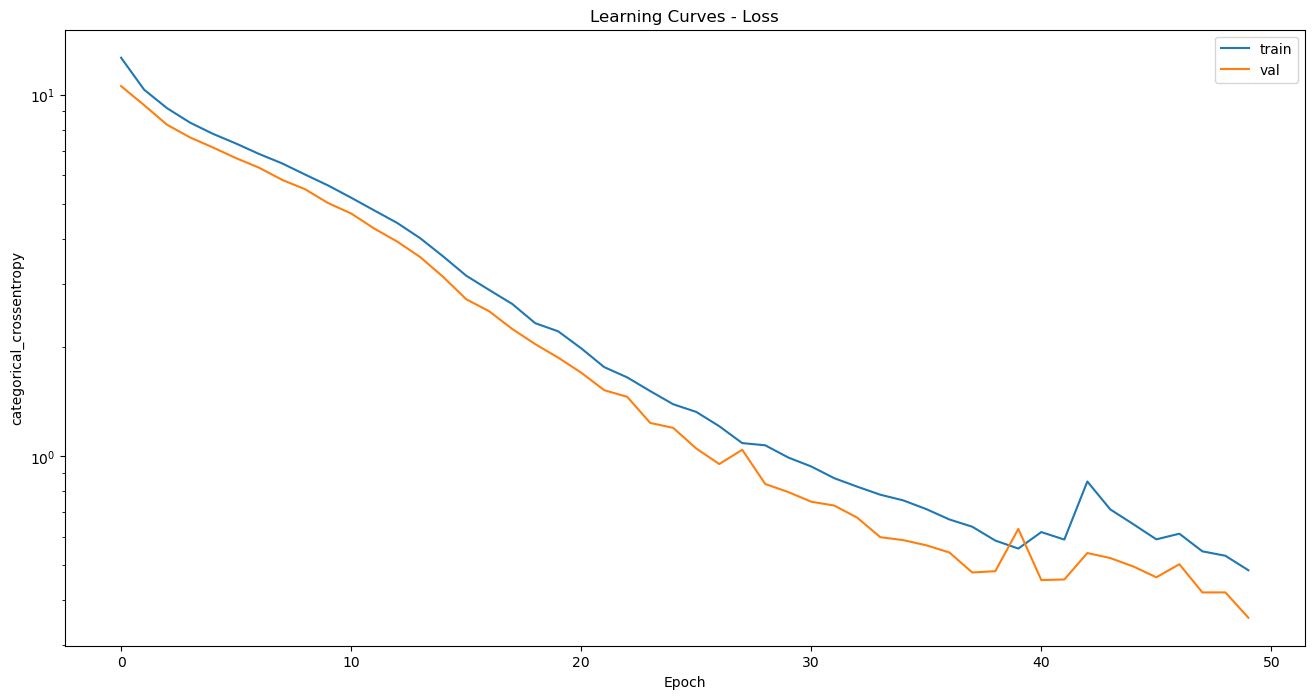

In [20]:
plt.figure(figsize=(16, 8))
plt.title('Learning Curves - Loss')
plt.xlabel('Epoch')
plt.ylabel('categorical_crossentropy')

#escala logarítimica, para facilitar a visualização
plt.semilogy(history.history['loss'], label='train')
plt.semilogy(history.history['val_loss'], label='val')
plt.legend()
plt.show()

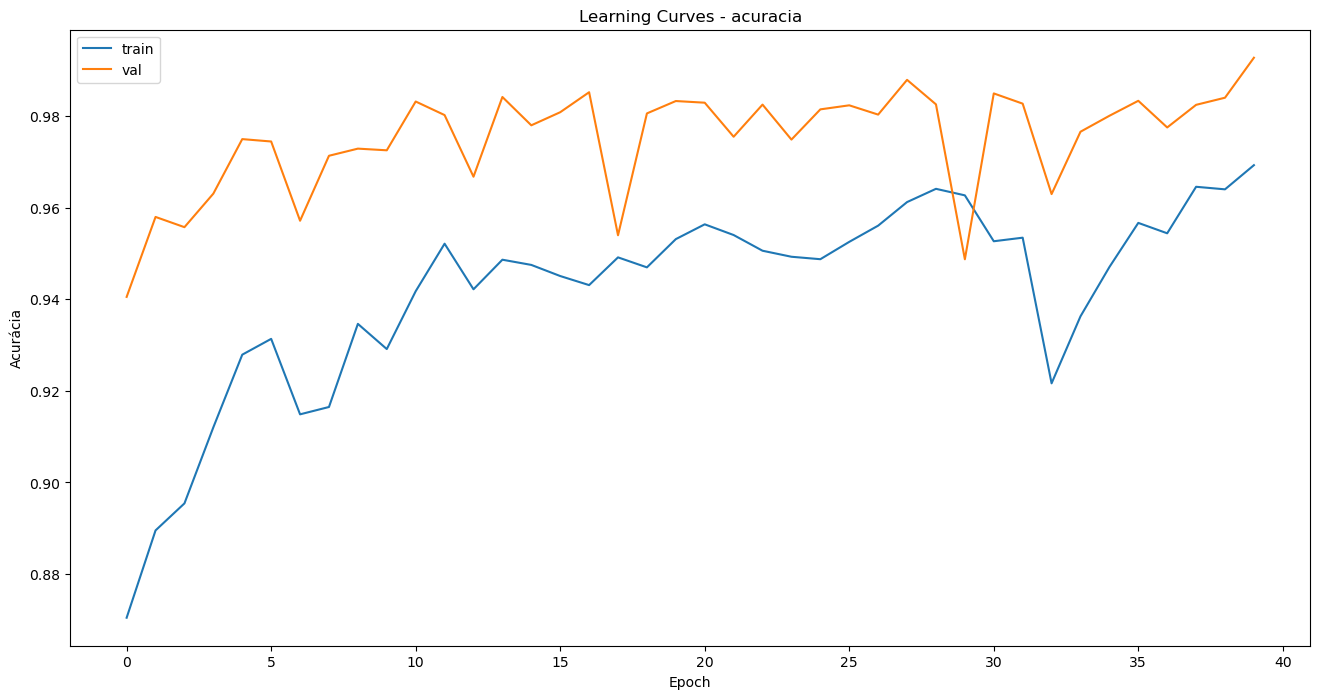

In [21]:
plt.figure(figsize=(16, 8))
plt.title('Learning Curves - acuracia')
plt.xlabel('Epoch')
plt.ylabel('Acurácia')
plt.plot(history.history['accuracy'][10:], label='train')
plt.plot(history.history['val_accuracy'][10:], label='val')
plt.legend()
plt.show()

In [22]:
# evaluate the model
_, train_acc = teste.evaluate(x_train, y_train, verbose=0)
_, test_acc = teste.evaluate(x_test, y_test,  verbose=0)

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.994, Test: 0.993


2005/2005 [==============================] - 7s 3ms/step


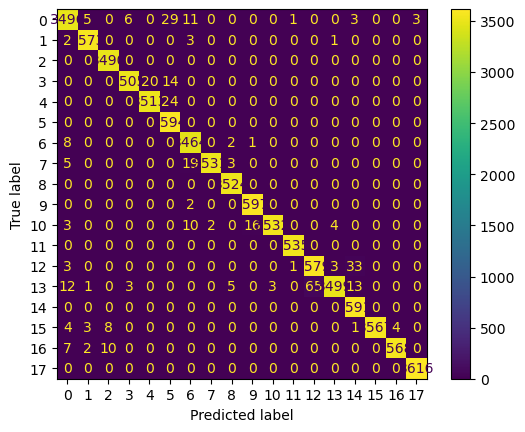

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = teste.predict(x_train)

#aplica a função argmax
y_pred = np.argmax(y_pred, axis=1)
y = np.argmax(y_train, axis=1)

#calcula a matriz de confusão
cm = confusion_matrix(y, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()